# イメージを読み込む (os.listdir  vs  glob.glob)

https://stackoverflow.com/questions/13643558/should-glob-glob-be-preferred-over-os-listdir-or-the-other-way-around

In [1]:
#!pip install tensorflow==2.2.0

In [2]:
import numpy  as np
import os
import glob 
import re

import matplotlib.pyplot as plt
import tensorflow as tf

from PIL import Image

%matplotlib inline

## osを使用する場合

In [3]:
path = './training' 
flist = os.listdir(path)

In [4]:
!ls -a ./training

.                  cat1.txt           cat5.jpeg          dog3.jpeg
..                 cat2.jpeg          classes.txt        dog4.jpeg
.ipynb_checkpoints cat3.jpeg          dog1.jpeg          dog5.jpeg
cat1.jpeg          cat4.jpeg          dog2.jpeg


In [5]:
flist

['cat1.txt',
 'classes.txt',
 'cat1.jpeg',
 'dog1.jpeg',
 'cat4.jpeg',
 'dog3.jpeg',
 'dog2.jpeg',
 'cat5.jpeg',
 '.ipynb_checkpoints',
 'cat2.jpeg',
 'dog5.jpeg',
 'dog4.jpeg',
 'cat3.jpeg']

In [6]:
# 不可視ファイルの.DS_Storeファイルを除いて読み込む

'''
余談

.DS_Storeファイルとは？ 開けるの？

https://miloserdov.org/?p=3867

'''


flist_ignore = [name for name in os.listdir(path) if not name.startswith('.')]
flist_ignore

['cat1.txt',
 'classes.txt',
 'cat1.jpeg',
 'dog1.jpeg',
 'cat4.jpeg',
 'dog3.jpeg',
 'dog2.jpeg',
 'cat5.jpeg',
 'cat2.jpeg',
 'dog5.jpeg',
 'dog4.jpeg',
 'cat3.jpeg']

In [7]:
flist_ignore

['cat1.txt',
 'classes.txt',
 'cat1.jpeg',
 'dog1.jpeg',
 'cat4.jpeg',
 'dog3.jpeg',
 'dog2.jpeg',
 'cat5.jpeg',
 'cat2.jpeg',
 'dog5.jpeg',
 'dog4.jpeg',
 'cat3.jpeg']

## globを使用する場合

In [8]:
img_list = glob.glob('training' + '/*' + ".jpeg")

In [9]:
img_list 

['training/cat1.jpeg',
 'training/dog1.jpeg',
 'training/cat4.jpeg',
 'training/dog3.jpeg',
 'training/dog2.jpeg',
 'training/cat5.jpeg',
 'training/cat2.jpeg',
 'training/dog5.jpeg',
 'training/dog4.jpeg',
 'training/cat3.jpeg']

# イメージのロード、配列化、リサイズ、データセット作成

In [10]:
# np.resizeはだめ、ぜったい

dog_img_array = np.empty((0,224,224,3))
cat_img_array = np.empty((0,224,224,3))

for img in img_list:
    
    # ファイル名に'dog'が含まれるイメージ
    if re.search('dog', img):
        print('dog')
        dog_img_ = Image.open(img)
        
        # サイズを揃える
        dog_img_ = dog_img_.resize((224, 224))
        
        # PIL.Image.Imageからnumpy配列へ
        dog_img = np.array(dog_img_)
        
        # 正規化
        dog_img = dog_img / 255.
        
        # axisの追加
        dog_img = dog_img.reshape((1,224,224,3))
        
        dog_img_array = np.concatenate([dog_img_array, dog_img], axis = 0)
        
        dog_img_.close()
    
    # ファイル名に'cat'が含まれるイメージ
    if re.search('cat', img):
        
        print('cat')
        cat_img_ = Image.open(img)
        
        cat_img_ = cat_img_.resize((224, 224))
        
        cat_img = np.array(cat_img_)
        
        cat_img = cat_img / 255.
        
        cat_img = cat_img.reshape((1,224,224,3))
        
        cat_img_array = np.concatenate([cat_img_array, cat_img], axis = 0)
        
        cat_img_.close()

cat
dog
cat
dog
dog
cat
cat
dog
dog
cat


In [11]:
print('dog_image:{}  cat_image:{}'.format(dog_img_array.shape, cat_img_array.shape))

dog_image:(5, 224, 224, 3)  cat_image:(5, 224, 224, 3)


# イメージの出力

In [12]:
# 配列のまま出力

print('データ型:', cat_img_array[3].dtype)

cat_img_array[3]

データ型: float64


array([[[0.77254902, 0.51372549, 0.30980392],
        [0.74901961, 0.49019608, 0.28235294],
        [0.7254902 , 0.47058824, 0.2627451 ],
        ...,
        [0.95294118, 0.94117647, 0.90588235],
        [0.95294118, 0.94117647, 0.90588235],
        [0.95294118, 0.94117647, 0.90588235]],

       [[0.74509804, 0.49019608, 0.27843137],
        [0.72156863, 0.46666667, 0.25098039],
        [0.70196078, 0.44705882, 0.23137255],
        ...,
        [0.95294118, 0.94117647, 0.90588235],
        [0.95294118, 0.94117647, 0.90588235],
        [0.95294118, 0.94117647, 0.90588235]],

       [[0.71372549, 0.45098039, 0.23137255],
        [0.69019608, 0.43529412, 0.20784314],
        [0.67843137, 0.41960784, 0.19215686],
        ...,
        [0.95294118, 0.94117647, 0.90588235],
        [0.95294118, 0.94117647, 0.90588235],
        [0.95294118, 0.94117647, 0.90588235]],

       ...,

       [[0.83137255, 0.63921569, 0.36862745],
        [0.86666667, 0.6745098 , 0.40392157],
        [0.89411765, 0

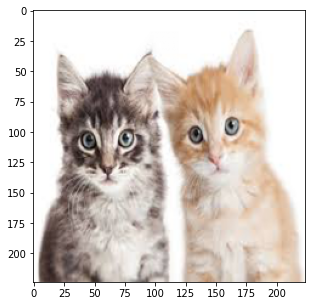

In [13]:
# 配列を画像として出力

plt.rcParams['figure.figsize'] = (5.0, 5.0)

plt.imshow(cat_img_array[1])

plt.show()

In [14]:
'''

画像の中心を切り出し

https://note.nkmk.me/python-pillow-image-crop-trimming/

'''


def crop_center(pil_img, crop_width, crop_height):
    
    img_width, img_height = pil_img.size
    
    # left, upper, right, lowerの順
    return pil_img.crop(((img_width - crop_width) // 2,
                         (img_height - crop_height) // 2,
                         (img_width + crop_width) // 2,
                         (img_height + crop_height) // 2))


<class 'PIL.Image.Image'>


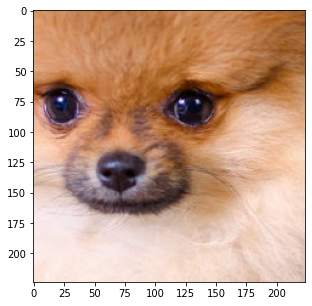

In [15]:
img = Image.open(img_list[4])

img_new = crop_center(img, 224, 224)

print(type(img_new))

plt.imshow(img_new)

plt.show()

img.close()

## Kerasでも読み込んでみよう

In [16]:
from keras.preprocessing.image import load_img, img_to_array

In [17]:
img_keras = load_img(img_list[4], grayscale=False, color_mode='rgb', target_size=(224,224))

img_keras_array = img_to_array(img_keras) / 255.

print('データ型:', img_keras_array.dtype)

img_keras_array

データ型: float32


array([[[0.7490196 , 0.67058825, 0.6745098 ],
        [0.7490196 , 0.67058825, 0.6745098 ],
        [0.74509805, 0.6666667 , 0.67058825],
        ...,
        [0.7019608 , 0.60784316, 0.5921569 ],
        [0.69411767, 0.6117647 , 0.5921569 ],
        [0.7019608 , 0.61960787, 0.6       ]],

       [[0.74509805, 0.6666667 , 0.67058825],
        [0.74509805, 0.6666667 , 0.67058825],
        [0.7372549 , 0.65882355, 0.6627451 ],
        ...,
        [0.69803923, 0.6039216 , 0.5882353 ],
        [0.69411767, 0.6117647 , 0.5921569 ],
        [0.7019608 , 0.61960787, 0.6       ]],

       [[0.7411765 , 0.6627451 , 0.6666667 ],
        [0.7411765 , 0.6627451 , 0.6666667 ],
        [0.7372549 , 0.65882355, 0.6627451 ],
        ...,
        [0.69411767, 0.6       , 0.58431375],
        [0.68235296, 0.6       , 0.5803922 ],
        [0.6901961 , 0.60784316, 0.5882353 ]],

       ...,

       [[0.78431374, 0.7058824 , 0.7019608 ],
        [0.7921569 , 0.6901961 , 0.7019608 ],
        [0.80784315, 0

<class 'PIL.Image.Image'>


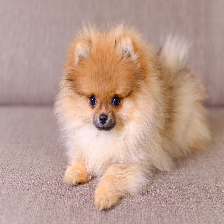

In [18]:
print(type(img_keras))

img_keras

## Resizeについて

In [19]:
import cv2

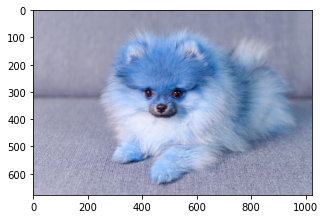

In [20]:
# 元のサイズの画像

# RGBではなくGBRで呼び出される
img = cv2.imread(img_list[4], 1)

plt.imshow(img)

plt.show()

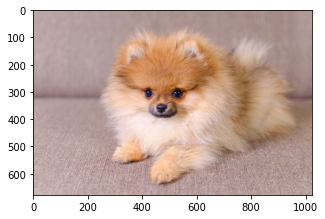

In [21]:
# 順番を入れ替えれば戻せる
img = img[:, :, [2, 1, 0]]

plt.imshow(img)

plt.show()

In [22]:
img.shape

(678, 1024, 3)

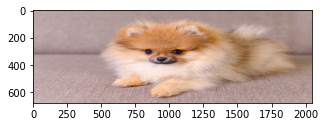

In [23]:
#plt.rcParams['figure.figsize'] = (10.0, 10.0)

# 横幅2倍にしてみる
img2 = cv2.resize(img, None, fx = 2, fy = 1)

plt.imshow(img2)

plt.show()

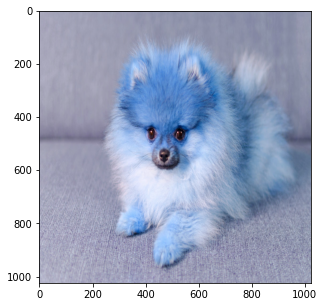

In [24]:
img = cv2.imread(img_list[4])


# cv2でリサイズ　ピクセル補間の方法も指定できる
'''
cv2.INTER_NEAREST :最近傍補間
cv2.INTER_LINEAR :双線形補間（拡大むき）
cv2.INTER_AREA :平均画素法。モアレを軽減させる内挿（縮小むき）
cv2.INTER_CUBIC:4×4 の近傍領域を利用するバイキュービック補間（拡大むき）
cv2.INTER_LANCZOS4:8×8 の近傍領域を利用する Lanczos法の補間

下に行くほど計算時間がかかる



https://www.tech-tech.xyz/opecv_resize.html

http://tessy.org/wiki/index.php?%B2%E8%C1%FC%A4%CE%A5%EA%A5%B5%A5%A4%A5%BA

https://github.com/ArunJayan/OpenCV-Python/search?q=cv2.resize&unscoped_q=cv2.resize

http://labs.eecs.tottori-u.ac.jp/sd/Member/oyamada/OpenCV/html/py_tutorials/py_imgproc/py_geometric_transformations/py_geometric_transformations.html

https://www.tutorialkart.com/opencv/python/opencv-python-resize-image/

'''

img = cv2.resize(img, (1024, 1024), cv2.INTER_NEAREST)

plt.imshow(img)

plt.show()

# openCVの色形式

## グレースケール 

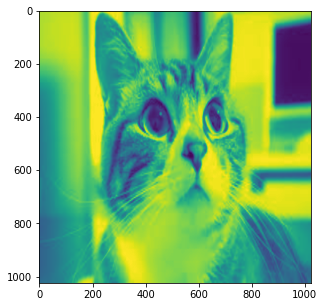

In [25]:
# 第二引数を0にするとグレースケールで読み込める
plt.rcParams['figure.figsize'] = (5.0, 5.0)

img = cv2.imread(img_list[5], 0)

# cv2でリサイズ
img = cv2.resize(img, (1024, 1024), cv2.INTER_NEAREST)

plt.imshow(img)

plt.show()

In [26]:
img_array_1 = img_to_array(img) / 255.
img_array_1.shape

(1024, 1024, 1)

## BGRとRGB

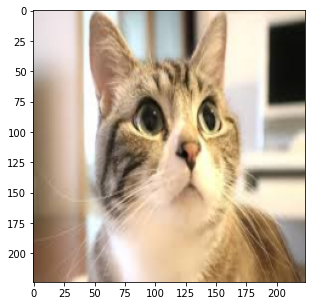

In [27]:
'''

なぜ彼らはOpenCVでBGRカラースペースを選択したのですか？

OpenCVの初期の開発者がBGRカラー形式を選択した理由は、
当時のBGRカラー形式がカメラメーカーとソフトウェアプロバイダーの間で人気があったためです。
たとえば、Windowsでは、COLORREFを使用して色の値を指定する場合、BGR形式0x00bbggrrを使用します。

BGRは歴史的な理由から選択されたものであり、今ではBGRと共存しなければなりません。
言い換えれば、BGRはOpenCVの馬のお尻です。

https://www.learnopencv.com/why-does-opencv-use-bgr-color-format/

'''


img = cv2.imread(img_list[5])
img = cv2.resize(img, (224, 224))

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# RGBチャネル

plt.imshow(img_rgb)

plt.show()

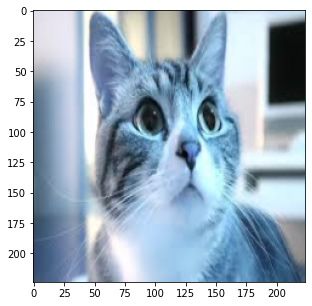

In [28]:
# BGRチャネル

plt.imshow(img)

plt.show()

# 【問題1】自作データセットでの分類の学習
自作のデータセットに対して分類問題を解いてください。任意の実装を使用してください。
例えば、分類問題はKerasチュートリアルにあるCNN等でベースモデルラインを作成しても良いですし、これまでの課題で作成したモデルでも構いません。

In [29]:
# train_data
img_array = np.concatenate([dog_img_array, cat_img_array], axis=0)
img_array.shape

(10, 224, 224, 3)

In [30]:
# label
target_array = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1]).reshape(10, -1)
target_array.shape

(10, 1)

In [31]:
# # Onehotencode
# from sklearn.preprocessing import OneHotEncoder
# enc = OneHotEncoder(sparse=False)
# target = enc.fit_transform(target_array.reshape(10, -1))
# target.shape

In [32]:
from sklearn.model_selection import train_test_split
train_img, test_img, train_label, test_label = train_test_split(img_array, target_array, stratify=target_array, test_size=0.2, random_state=0)

In [33]:
# 同数
train_img.shape
train_label

array([[0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1]])

In [34]:
train_img.shape

(8, 224, 224, 3)

## 推定

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import optimizers


def create_model():
    
    model = tf.keras.Sequential([
        Conv2D(16, 3, activation='relu', input_shape=(224, 224 ,3)),
        MaxPooling2D(),
        Conv2D(32, 3, activation='relu'),
        MaxPooling2D(),
        Conv2D(64, 3, activation='relu'),
        MaxPooling2D(),
        Flatten(),
        Dense(500, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

In [36]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 43264)             0

2021-09-02 22:01:20.084707: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [37]:
model.compile(
    optimizer='adam',
    loss = 'BinaryCrossentropy',
    metrics='accuracy'
)

In [38]:
history = model.fit(train_img, train_label, validation_split=0.2, epochs=20)

2021-09-02 22:01:20.513515: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
1/1 [==============================] - 1s 782ms/step - loss: 0.7024 - accuracy: 0.5000 - val_loss: 1.4901 - val_accuracy: 0.5000
Epoch 2/20
1/1 [==============================] - 0s 200ms/step - loss: 0.6816 - accuracy: 0.6667 - val_loss: 5.0305 - val_accuracy: 0.5000
Epoch 3/20
1/1 [==============================] - 0s 232ms/step - loss: 4.0816 - accuracy: 0.5000 - val_loss: 1.4193 - val_accuracy: 0.5000
Epoch 4/20
1/1 [==============================] - 0s 229ms/step - loss: 1.0068 - accuracy: 0.5000 - val_loss: 0.7168 - val_accuracy: 0.5000
Epoch 5/20
1/1 [==============================] - 0s 251ms/step - loss: 0.4118 - accuracy: 0.8333 - val_loss: 0.9607 - val_accuracy: 0.5000
Epoch 6/20
1/1 [==============================] - 0s 273ms/step - loss: 0.5428 - accuracy: 0.6667 - val_loss: 0.9210 - val_accuracy: 0.5000
Epoch 7/20
1/1 [==============================] - 0s 281ms/step - loss: 0.4009 - accuracy: 0.8333 - val_loss: 0.7472 - val_accuracy: 0.5000
Epoch 8/20
1/1 [====

In [39]:
import pandas as pd
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.702426,0.500000,1.490091,0.5
1,0.681585,0.666667,5.030532,0.5
2,4.081620,0.500000,1.419276,0.5
3,1.006850,0.500000,0.716801,0.5
4,0.411838,0.833333,0.960661,0.5
5,0.542785,0.666667,0.920960,0.5
6,0.400936,0.833333,0.747245,0.5
7,0.255681,0.833333,0.693354,0.5
8,0.212192,1.000000,0.768569,0.5
9,0.129262,1.000000,1.230605,0.5


In [40]:
model.evaluate(test_img, test_label)

1/1 [==============================] - 0s 29ms/step - loss: 0.7663 - accuracy: 0.0000e+00


[0.7663042545318604, 0.0]

データが少なすぎて、実用性がない

## 【問題2】分類データセットに対するデータ拡張
集めた画像をデータ拡張（Data Augmentation）してください。
画像を反転させたり、色を変えたり、クロッピング（一部だけ切り出す）などをしましょう。
また、下記にデータ拡張のためのライブラリがありますので、参考になりましたら幸いです。

In [41]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [42]:
generater = ImageDataGenerator(
           rotation_range=90,
           width_shift_range=20,
           height_shift_range=0,
           shear_range=0,
           zoom_range=0,
           horizontal_flip=False,
           vertical_flip=False)

In [43]:
# 学習, roundは何周学習させるか
# generater.fit(train_img, rounds=1)

# データ作成、bachiは32で一つだけ作成される発生機を作成。(今回は8枚しかないので、8個が限界？？？　＠質問)
# やりたい事としては、bachisizeが8の　ミニバッチをたくさん作りたい

train_generater = generater.flow(train_img, train_label, batch_size=2)

In [44]:
# 画像は増えない.....
# これの一つ目のshapeは何？
# イメージだとバッチサイズの画像の塊が作成されて、それが一つ目のshapeに格納されると思ってた
# 2枚の画像の組み合わせが4つ作成されている

# 二つ目は画像か、ラベルか
train_generater[1][0].shape

(2, 224, 224, 3)

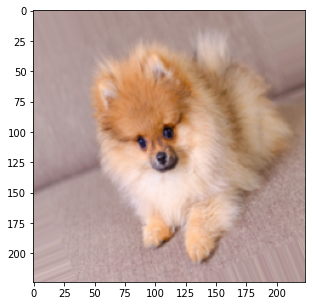

In [45]:
# 傾いてはいる
plt.imshow(train_generater[0][0][0])

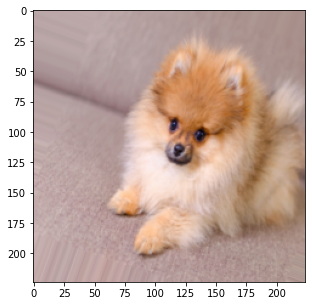

In [46]:
# 毎回違う画像が出てくるってことは、randomで作ってる？？？？
plt.imshow(train_generater[0][0][0])

In [47]:
model = create_model()
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),
    loss = 'BinaryCrossentropy',
    metrics='accuracy'
)

In [48]:
# 変更された画像、に対して10epoch回してるだけ
# あるいはepoch毎に違う画像に対して学習している？？？？？
# 重み計算はバッチ数増えるから学習頻度は増えている

# step_per_epochはepoch毎になん個のbatchを引っ張ってくるか(おそらくランダム)dropoutみたいな学習ができるのかな


history = model.fit_generator(train_generater, steps_per_epoch=4, epochs=20, verbose=1)

/opt/anaconda3/envs/always/lib/python3.8/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
4/4 [==============================] - 1s 158ms/step - loss: 1.8965 - accuracy: 0.3750
Epoch 2/20
4/4 [==============================] - 1s 131ms/step - loss: 0.9530 - accuracy: 0.5000
Epoch 3/20
4/4 [==============================] - 1s 130ms/step - loss: 0.5707 - accuracy: 0.8750
Epoch 4/20
4/4 [==============================] - 1s 134ms/step - loss: 0.6909 - accuracy: 0.5000
Epoch 5/20
4/4 [==============================] - 1s 123ms/step - loss: 0.7428 - accuracy: 0.5000
Epoch 6/20
4/4 [==============================] - 1s 132ms/step - loss: 0.5578 - accuracy: 0.6250
Epoch 7/20
4/4 [==============================] - 1s 135ms/step - loss: 0.6968 - accuracy: 0.6250
Epoch 8/20
4/4 [==============================] - 1s 128ms/step - loss: 0.4807 - accuracy: 0.7500
Epoch 9/20
4/4 [==============================] - 1s 128ms/step - loss: 0.4699 - accuracy: 0.7500
Epoch 10/20
4/4 [==============================] - 1s 128ms/step - loss: 0.3216 - accuracy: 0.7500
Epoch 11/20
4/4 [==

In [49]:
model.evaluate(test_img, test_label)

1/1 [==============================] - 0s 117ms/step - loss: 1.8688 - accuracy: 0.5000


[1.868828535079956, 0.5]

## 考察

1. epoch毎にgeneraterで画像が作成される。  
2. batch毎に重みは学習される。  
3. batchを増やすと、過学習する？？？(train_dataに対して学習回数が増えるため)  
4. epochを増やすと、毎回ノイズが乗った画像に対して学習を行うので過学習はしずらい  
5. 増やしすぎるとノイズの乗った訓練データに適応するので、テストデータには適応できない。　　

# 【問題3】物体検出データセットの用意
次に、物体検出を行います。バウンディングボックスのアノテーションを行い物体検出のためのデータセットを作成してください。


《アノテーションのためのツール》


アノテーションツールにはLabelImgなどがあります。

![Imgur](https://i.imgur.com/UTIcKnah.png)

# 【問題4】物体検出データセットに対するデータ拡張
データ拡張（Data Augmentation）を行ってください。前述のalbumentationsはバウンディングボックスを合わせての加工が可能です。詳細はREADME.mdを確認してください。


物体検出の学習を行なうかどうかは任意とします。


xmlファイルを扱うライブラリがありますので下記をご確認ください。

In [50]:
from PIL import Image
import numpy as np
import numpy  as np
import os
import glob 
import re
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import albumentations as albu
%matplotlib inline

## 画像の読み込み

In [134]:
img = cv2.imread('./training/cat1.jpeg')

In [135]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

## 画像反転

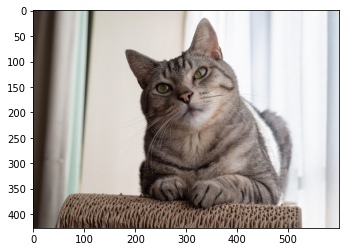

In [152]:
# 左右反転
img = albu.HorizontalFlip(p=1)(image=img)['image']
plt.imshow(img)

## バウンディボックス

In [153]:
# 公式パイプライン

transform = albu.Compose([
    albu.RandomCrop(width=600, height=427),
    albu.HorizontalFlip(p=0.3),
    albu.RandomBrightnessContrast(p=0.2),
], bbox_params=albu.BboxParams(format='yolo'))

In [154]:
# ラベル(labelmgで得られた値)
bboxes = [
    [0.575000, 0.468384, 0.560000, 0.889930, 'cat']]

In [155]:
transformed = transform(image=img, bboxes=bboxes)

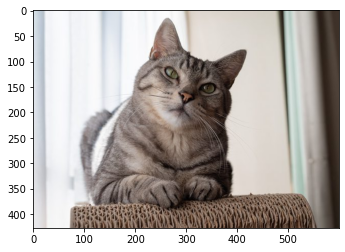

In [156]:
transformed_image = transformed['image']
plt.imshow(transformed_image);

In [146]:
transformed_bboxes = transformed['bboxes']
transformed_bboxes

[(0.42500000000000004, 0.468384, 0.56, 0.8899299999999999, 'cat')]

## 考察

なんとなく使い方は理解できたが、バウンディボックスは表示できなかった！！  
なんでなのかはわかりません。  
本格的に画像コンペとか出るときに調べてみてもいいかも